In [2]:
import pandas as pd
import numpy as np
import cv2 
import torch as t
from matplotlib import pyplot as plt

# Imports 
from pathlib import Path


CONTENT_DIR = Path.home() / 'Datasets' / 'unpackAI' / 'DL201-4.0' # Change this for use in colab
DATA_DIR = Path.cwd() /'..'/'data'

# Section 3: Broadcasting
<hr style="border:4px solid gray"> </hr>

### Goals

1.  To grasp the potential power of broadcasting as a fast, and efficient method from a code first perspective to manipulate vast ammounts of number and text data without writing loops.

2. To Apply the principles of indexing and broadcasting together independently of the course through self learning

### Objectives


F. To apply the index and broadcast method to tabular data to perform simple data cleaning tasks

G. To use the index and broadcast method for edge detection and applying filters to image data

H. To use our indexed NLP data and broadcast basic cleaning operations to it to pave the road to getting basic statistics. 


## Introduction to Broadcasting
<hr style="border:2px solid gray"> </hr>

Broadcasting is a simple operation in Lin

In [187]:
square = np.array([[1,1,1],[1,1,1],[1,1,1]])
cube = np.array([square,square,square])
box = np.array([square,square,square,square,square])

large_square = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
example_image = np.array([large_square,large_square,large_square])

(5000, 14)

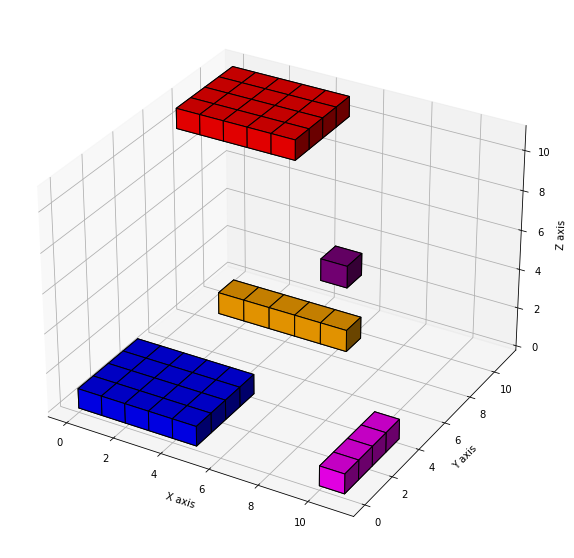

In [30]:
plot_all_compatible_shapes(personalLoans)

In [33]:
def plot_all_compatible_shapes(data,figure_size=10):
    """
    Takes a 3D or 2D Numpy array, then visualizes it 
    on matplotlib
    
    """
    
    # If someone inputs a dataframe, this will show up
    example_df = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
    
    if (data.shape[0] > 10 ) | (data.shape[1] > 10) & len(data.shape) < 3:
        data = example_df
    
    plot_size = sum(list(data.shape)) + 2 
    
    x_index = plot_size
    y_index = plot_size
    z_index = plot_size
    
    x, y, z = np.indices((x_index, y_index, z_index))
    
    if (len(data.shape) > 3):
        print('too many dimensions')


    if len(data.shape) == 3:
            
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < data.shape[2])
        
            
        compatible_shape3D = (x >= x_index - data.shape[0]) & (y >= y_index - data.shape[1]) & ( z >= z_index - data.shape[2])
        
        ### 2D shapes 
        
        
        compatible_shape2D_side1 = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        
        
        ## Creates a side by offsetting it next to side 1
        ## Then removes the x asis
        # Preserves y and z
        
        offset = 2
        
        shape2yAxisEnd = y_index - data.shape[1] - offset 
        shape2yAxisBegin = shape2yAxisEnd - data.shape[1] - 1
            
        z_bounds = (z >= z_index - (data.shape[2]))
        y_bounds = ((shape2yAxisBegin < y ) & (y < shape2yAxisEnd))   
        x_bounds = (x < 1 )
    
        compatible_shape2D_side2 = x_bounds & y_bounds & z_bounds

        # Elevates original shape to top of Graph, then flattens y axis to 1
        
        compatible_shape2D_side3 = (x < data.shape[0]) & (y < 1) & (z >= (z_index - data.shape[2]))
        
        ### 1D shapes
        
        # Interested in length
        compatible_shape1D_length = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[1])) & (z < z_index - (z_index - 1 ) )

        compatible_shape1D_height = (x >= x_index - 1) & (y < y_index- (y_index - 1)) & (z <  data.shape[2] )

        
        
        
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )

        # combine the objects into a single boolean array
        
        voxelarray = shape | compatible_shape3D | compatible_shape2D_side1 | compatible_shape2D_side2 | compatible_shape2D_side3 | compatible_shape1D_length | compatible_shape1D_width | compatible_shape1D_height | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)
        
        colors[shape] = 'blue'
        colors[compatible_shape3D] = 'green'
        colors[compatible_shape2D_side1] = 'red'
        colors[compatible_shape2D_side2] = 'yellow'
        colors[compatible_shape2D_side3] = 'cyan'
        

        colors[compatible_shape1D_length] = 'orange'
        colors[compatible_shape1D_width] = 'magenta'
        colors[compatible_shape1D_height] = 'violet'
        
        
        
        colors[scalar] = 'purple'



    elif len(data.shape) == 2:
        
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < 1)
        
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        
        
        compatible_shape1D_length = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & ((round(plot_size/2) < z ) & (z <= round(plot_size/2) + 1))
        
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[1])) & (z < z_index - (z_index - 1 ) )

        #compatible_shape1D_height = (x >= x_index - 1) & (y < y_index- (y_index - 1)) & (z < 1 )

        
        
        
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | compatible_shape2D | compatible_shape1D_length | compatible_shape1D_width | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)

        colors[shape] = 'blue'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D_length] = 'orange'
        colors[compatible_shape1D_width] = 'magenta'
        
        colors[scalar] = 'purple'
        

        #colors[compatible_shape1D_height] = 'violet'
        
        
        
        

    else:
        print('1')
        shape = (x < data.shape[0]) & (y < 1) & (z < 1)
        
        #compatible_shape1D_length = (x >= data.shape[0]) & (y <  1) & (z < 1 )
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[0])) & ((round(plot_size/2) < z ) & (z <= round(plot_size/2) + 1))#(round(plot_size/2) < z <= (round(plot_size/2) + 1) )

        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        
        
        voxelarray = shape | compatible_shape1D_width | scalar

    # combine the objects into a single boolean array

    # set the colors of each object
        colors = np.empty(voxelarray.shape, dtype=object)

        
        colors[shape] = 'blue'
        #colors[compatible_shape1D_length] = 'orange'
        colors[compatible_shape1D_width]  = 'magenta'
        colors[scalar] = 'purple'
        
    
    ax = plt.figure(figsize=(figure_size,figure_size)).add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=colors, edgecolor='k')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    # Labeling the graphs 
    #label = 'test'
    #zdir = (1,1,1)
    
    #xs = 5
    #ys = 5
    #zs = 5
    
    
    
    
    #ax.text(xs, ys, zs, label, zdir)
    
    
        

    plt.show()


In [34]:
def plot_compatible_shapes_simple(data,figure_size=10):
    
    """
    Shows a simple example to show the broadcasting rules 
    You can multiple a shape by any of it's edges or sides
    
    
    """
    # Sets up a 3D  space as large as all the dimensions summed with 1 as a buffer
    
    plot_size = sum(list(data.shape)) + 2 
    
    x_index = plot_size
    y_index = plot_size
    z_index = plot_size
    
    x, y, z = np.indices((x_index, y_index, z_index))
    
    
    # Sets up conditions to use
    
    if (len(data.shape) > 3):
        print('too many dimensions')


    if len(data.shape) == 3:
            
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < data.shape[2])
        
        
            
        compatible_shape3D = (x >= x_index - data.shape[0]) & (y >= y_index - data.shape[1]) & ( z >= z_index - data.shape[2])
        
        
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        compatible_shape1D = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )

        # combine the objects into a single boolean array
        
        voxelarray = shape | compatible_shape3D | compatible_shape2D | compatible_shape1D | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)
        
        colors[shape] = 'blue'
        colors[compatible_shape3D] = 'green'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D] = 'orange'
        colors[scalar] = 'purple'



    elif len(data.shape) == 2:
        
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < 1)
        
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        compatible_shape1D = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        scalar = (x >= x_index - 1) & (y < 1 ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | compatible_shape2D | compatible_shape1D | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)

        colors[shape] = 'blue'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D] = 'orange'
        colors[scalar] = 'purple'

    else:
        shape = (x < data.shape[0]) & (y < 1) & (z < 1)

        #compatible_shape1D = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        
        
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | scalar

        
    # combine the objects into a single boolean array

    # set the colors of each object
        
        colors = np.empty(voxelarray.shape, dtype=object)

        
        colors[shape] = 'blue'
        #colors[compatible_shape1D] = 'orange'
        colors[scalar] = 'purple'
        
            
    
    ax = plt.figure(figsize=(figure_size,figure_size)).add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

    plt.show()


### Broadcasting

A big misconception with AI is that loops and if statements are what programming is. In this mindset, the program flows from top to bottom, and the state of every variable is very important.


However, it is not the only way to approach a problem. One benefit of python is that it is multi-paradigm, and very flexible. Let's leave these preconceptions behind, and it will enhance our understanding of AI. 

This approach doesn't work very well with large dataframes or tensors because it would be very slow to go one by one, top to bottom. The order we do the calculations isn't important across each column. Since each cell or element in the data is not sensitive to changes with the others. we can do them all at once. using the gpu.

The rules for this are explained using a type of linear algebra called broadcasting, which is how we can do math using different shapes. 

Let's take a look at the dataframe from before

In [ ]:
pd.read

In [6]:
vector = np.array([1,1,1,1,1,1,1])

In [7]:
vector.shape

(7,)

Another way to think about broadcasting works like this.

If we look at the original shape in the bottom, then our options get displayed on this 3D graph.

As you can see, all the the shapes share common dimensions.

The 3D compatibile shape is identical, meaning that every element in it gets broadcasted to every element in the orignal shape.



For a compatible 2D shape, it has to share the same side as the 3D shape. 

In [8]:
box.shape

(5, 3, 3)

In [9]:
rectangle = np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1]])

In [617]:
long_box = np.array([rectange,rectange,rectange,rectange,rectange,rectange])
long_box.shape

(6, 4, 3)

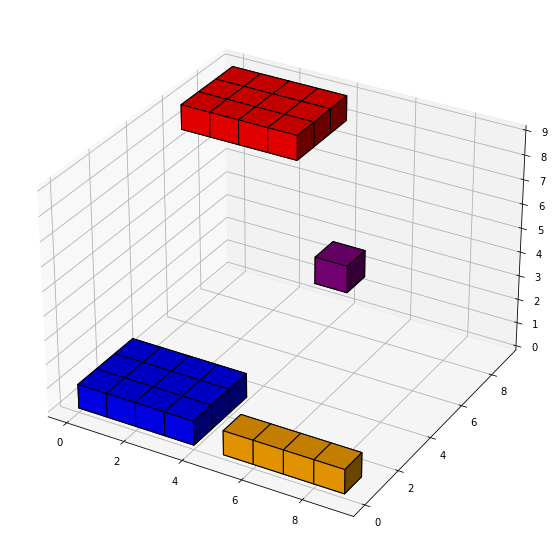

In [631]:
plot_compatible_shapes_simple(rectangle)

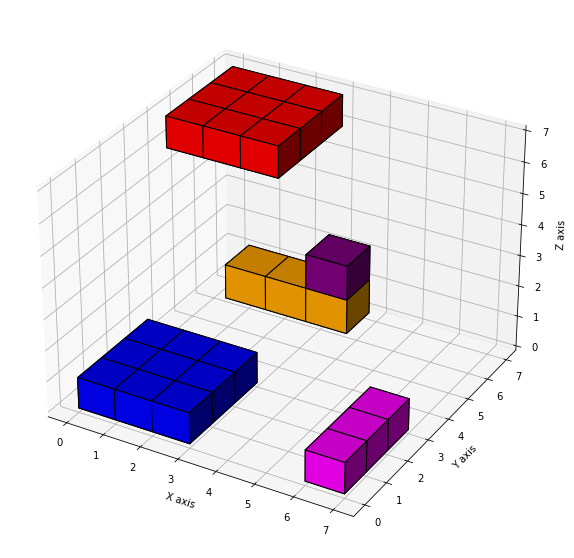

In [627]:
plot_all_compatible_shapes(square)

### Broadcasting Rules  




Once we can index data, we can then do operations on it.




## Part 1: Operations in Tabular Data
<hr style="border:2px solid gray"> </hr>

Now that we know how to access our data, we can now perform operations on it.

A powerful method that GPUs can manipulate data is through a method called broadcasting.

With broadcasting, GPUs can do what they do best by doing many operations at the same time to increase speed. 

Today, we are going to learn more about broadcasting in a practical way. 

This approach will be code based rather than math based. In this, all we need to understand is that once we know where our code is, we can perform operations on it

### Example 1: Converting data types: text to numbers
<hr style="border:1px solid gray"> </hr>



“Human progress is neither automatic nor inevitable... Every step toward the goal of justice requires sacrifice, suffering, and struggle; the tireless exertions and passionate concern of dedicated individuals.” 

The .str method of a Pandas Series is extremely useful. In one single line, it can do many things that would require writing a loop in pure python.

The principle here is in two steps:

Step 1: Index 

(Pass pandas an index and tell it which data you are selecting)

Step 2: Broadcast

Tell pandas what you want it to do by calling a method

Let's process these steps together.

In [56]:
#startupDataPath = CONTENT_DIR /'TAB'/'bank_loan'/'Bank_Personalloan_Modelling.csv'

startupDataPath = '../data/StartUpInvestments/investments_VC.csv'

startUpData = pd.read_csv(startupDataPath,encoding = 'unicode_escape')

In [57]:
# Let's cull down our dataset to the more complete entries

df = startUpData[(startUpData['funding_rounds'] > 1) & ( startUpData['round_A'] > 0 ) ].copy() #copy function makes a new object

#### Cleansing text data with pandas

One of the key features of pandas is what you can do using strings. If you can understand how to utilize this, you can automate 
a ton of office work, potentially saving hours each week. It is very possible to automate many tasks if you can understand how
to process text data in pandas. 

In this case, data will originally be inputted as text rather than numbers. One thing you can do is to convert them using the

as type method. But, occassionally the code will be a bit fussy about extra spaces and commas that make it easier for people to read

Problem: 


##### Removing text characters from a sample

In [253]:
# Let's try this first
df['funding_total_usd'] = df['funding_total_usd'].astype(np.int64)

This line will run an error, and will give you the first value where your operation failed. 
Why did this fail and how does the following line fix it? 

In [255]:
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',','')

##### Series.str.replace()

This can allow you to replace a character, or set of characters quite easily. 

Pandas handles text quite well, and is full of methods which can be found in the documentation or through an internet search. 


Here is a link to the documentation which will give you an overview:

https://pandas.pydata.org/pandas-docs/version/0.23.4/text.html

This link is to the documentation to all of the functionality for pandas strings. If you need to do something, then this will be a great friend. 

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html


Let's try running the code again. Now that we have this, it should work

In [250]:
df['funding_total_usd'] = df['funding_total_usd'].astype(np.int64)


Yet, we get another error, with a useful message. It shows that there is whitespace in this element of the pandas series

We can use the .str.strip() method to easily remove it, using only one line of code.

In [250]:
#df['funding_total_usd'] = df['funding_total_usd'].str.strip()

In [256]:
df['funding_total_usd'] = df['funding_total_usd'].astype(np.int64)


Now it works. Luckily for us, there were no errors. 

When dealing with large amounts of data, it is not only impractical, but impossible to check each value. 
Instead, we can rely on the python interpreter to find these error.

Although error messages contain some esoteric wording, generally, data exploration proceeds with encountering errors like this.



##### (Indicator Features)

Dummy variable

Indicates if feature meets multiple conditions

### Example 2: Creating a calculated field: (interaction features / grouping )
<hr style="border:1px solid gray"> </hr>


“You may be 38 years old, as I happen to be. And one day, some great opportunity stands before you and calls you to stand up for some great principle, some great issue, some great cause. And you refuse to do it because you are afraid…. You refuse to do it because you want to live longer…. You’re afraid that you will lose your job, or you are afraid that you will be criticized or that you will lose your popularity, or you’re afraid that somebody will stab you, or shoot at you or bomb your house; so you refuse to take the stand.

Well, you may go on and live until you are 90, but you’re just as dead at 38 as you would be at 90. And the cessation of breathing in your life is but the belated announcement of an earlier death of the spirit.” 

##### (Discretizing) Binning continous data


Supose that we want to create a new feature using the data we already have. The simplest way is to create a variable based on a condition. Doing this can allow you to make something much more clear to the model by flagging it as important. We can create a new feature to see if it meets a logical condition.

Let's start with the pandas series of 'founded year'

In [258]:
df.founded_year

15       2013.0
20       2010.0
22       2010.0
24          NaN
51       2007.0
          ...  
49424    2009.0
49426    2007.0
49428    2011.0
49430    1994.0
49437    1999.0
Name: founded_year, Length: 6126, dtype: float64

In [ ]:
# Input a histogram of founded years to show 



In [265]:
df['founded_before_2000'] = df['founded_year'] < 2000 

In [267]:
# Warm reminder, why is the shape of our new dataframe different now? 
df.shape

(6126, 40)

In [269]:
df['founded_in_2010s'] = ((df['founded_year']> 2010) & (df['founded_year'] > 2020))

  #WarmReminder :
  It is always a good idea to include ( ) around your logical comparisons so that python knows exactly what you want it to do. 
  


age, color categories

## Part 2 Brodcasting in Image Data
<hr style="border:2px solid gray"> </hr>

We are going to manipulate all the pixels, or elements in a specific way

Since images are tensors, we can broadcast conditons to them


Extending the vector idea, but instead using a kernel. But it's expensive to do it all at once, so a kernel is used

We can break up the matrix into sections, and then 


A matrix can be broken up into pieces

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_file_path = '../img/highway.jpg'
img = cv2.imread(image_file_path)


In [36]:
# If the shape is none, then your image did not load.
img.shape

(640, 960, 3)

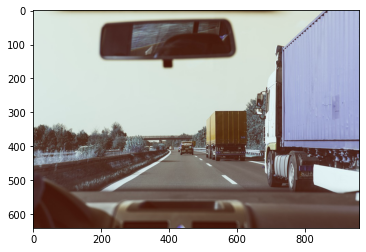

In [40]:
# Gaussian blur
img_array = np.array(img)
# weighs the middle more heavily 
plt.imshow(img_array)
plt.show()
# http://omz-software.com/pythonista/matplotlib/users/image_tutorial.html

Let's Take the shape, and see what we can do with it.


In [41]:
img_array.shape

(640, 960, 3)

Here, let's try to broadcast a number to this array. Let's try this with the number zero.
What will happen to this image if we broadcast the number zero to it? 



In [43]:
zero_array = img_array * 0

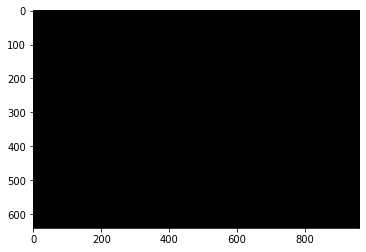

In [44]:
plt.imshow(zero_array)
plt.show()

It is not suprising that everything turned black. However, this is a bit crude. Let's increase the complexity of what we are doing and try to seperate out the color channels
What do you think will happen if we do this?


In [46]:
red_array = img_array * [1,0,0]

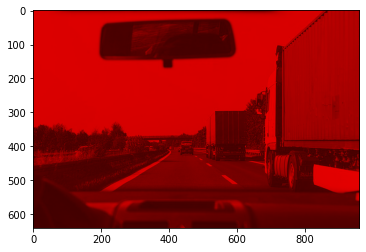

In [48]:
plt.imshow(red_array)
plt.show()

Can you seperate out the blue or green channel?

Bonus: Try to mess around with the values and see what happens, see if you can invent a new instagram filter

In [88]:
# See what instra

redValue = 0.5
greenValue = 0.4
blueValue = 0.8

fun_array = img_array * [redValue,greenValue,blueValue]
fun_array = np.array(fun_array.round(),dtype='uint8')
print(fun_array.max())

204


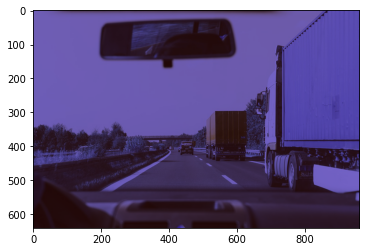

In [89]:
plt.imshow(fun_array)
plt.show()

In [99]:
vector = np.ones((img_array.shape[0]),dtype='uint8')
vector.shape

(640,)

In [100]:
#vector * img_array

ValueError: operands could not be broadcast together with shapes (640,) (640,960,3) 

If you want to expand 

In [180]:
list1 = []

for i in range(img_array.shape[0]):
    if i < (img_array.shape[0] / 2 ):
        list1.append(1)
    else:
        list1.append(0)
len(list1)

640

There's another problem that our list exists in 1D space. We need to expand it into 3D space. To meet the broadcasting rule, it needs to match a side, or the number one. 

* We need to change the list, so that it has the properties of width and height, even though they are only 1

In [197]:
vector = np.broadcast_to(list1,(1,1,640))

In [198]:
vector.shape

(1, 1, 640)

In [183]:
img_array.shape

(640, 960, 3)

(640, 1, 1)

The problem we have here is that the values do not match  exactly. These need to match down to the number, or it doesn't work 

The reason why is goes back to where the vector is. If the large value is in the x dimension, that means that it is pointing in that direction. If it is in the y dimension, it is pointing that way, and it is pointing here.

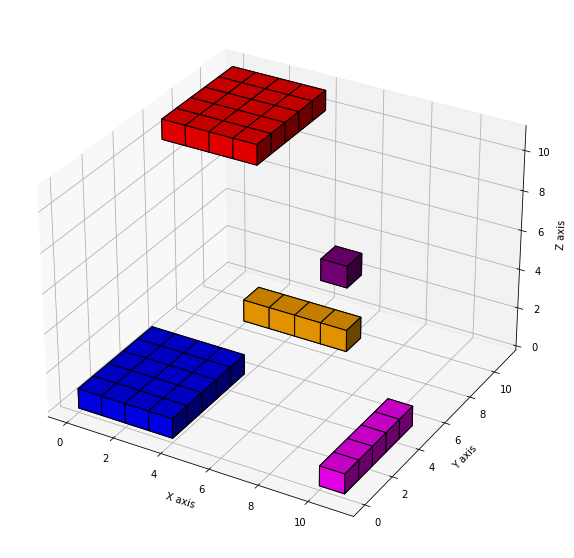

In [193]:
plot_all_compatible_shapes(example_image)

Let's transpose our matrix, and see what we can do.

In [203]:

vector = vector.T
vector.shape

In [204]:
new_array = img_array * vector

Now it works, let's plot it out.

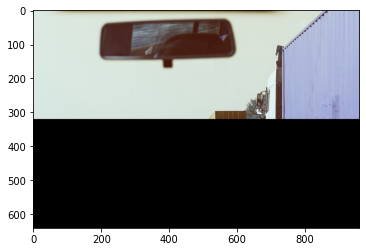

In [205]:
plt.imshow(new_array)
plt.show()

Why did it do this? 

In [184]:
vector = vector.T
vector.shape

(640, 1, 1)

These arrays are not equal, so we need to change them so that they match on the left. We can do that by transposing the values.

img_array

In [177]:
vector = vector.T

In [178]:
img_array * vector

array([[[221, 233, 227],
        [221, 233, 227],
        [221, 233, 227],
        ...,
        [174, 183, 217],
        [175, 184, 217],
        [175, 184, 217]],

       [[221, 233, 227],
        [221, 233, 227],
        [221, 233, 227],
        ...,
        [174, 183, 217],
        [175, 184, 217],
        [175, 184, 217]],

       [[221, 233, 227],
        [221, 233, 227],
        [221, 233, 227],
        ...,
        [175, 184, 218],
        [175, 184, 217],
        [176, 185, 218]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

We have now expanded our line into 3D space so it becomes compatible. We need to have the 1s there to make it work.

In [114]:
p

AttributeError: 'numpy.ndarray' object has no attribute 'key'

#### Edge Detection

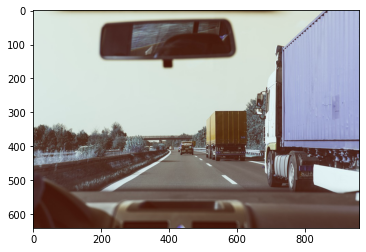

In [38]:
plt.imshow(img_array)

In [129]:
gaussianBlurImg = cv2.GaussianBlur(img,(15,15),0)

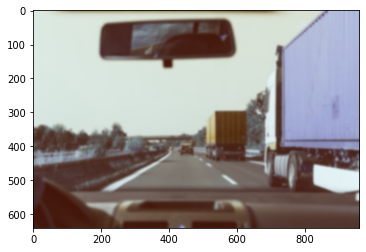

In [130]:
plt.imshow(gaussianBlurImg)

In [448]:
for i in range(10):
    gaussianBlurImg = cv2.GaussianBlur(gaussianBlurImg,(15,15),0)

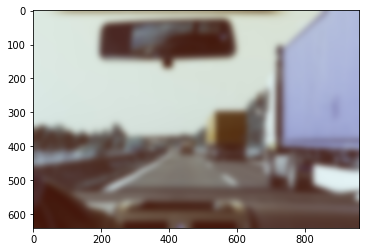

In [449]:
plt.imshow(gaussianBlurImg)

#### Normalizing, image blurring

In [303]:
# Kernel 

In [131]:
# Box Blur

def blur(a):
    row1 = [1,1,1]
    row2 = [1,8,1]
    row3 = [1,1,1]
    kernel = np.array([row1, row2, row3])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist = np.round(arraylist,0).astype(int)
    arraylist_sum = np.sum(arraylist, axis=0)
    
    return arraylist_sum

# Box Blur

def blur1(a):
    row1 = [0.3,0.3,0.3,0.3,0.3]
    row2 = [0.3,0.3,4,0.3,0.3]
    row3 = [0.3,4.0,12,4.0,0.3]
    row4 = [0.3,0.3,4,0.3,0.3]
    row5 = [0.3,0.3,0.3,0.3,0.3]
    kernel = np.array([row1, row2, row3,row4])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist = np.round(arraylist,0).astype(int)
    arraylist_sum = np.sum(arraylist, axis=0)
    
    return arraylist_sum

In [400]:
blurred_img = blur1(img_array)

In [401]:
blurred_img.shape

(640, 960, 3)

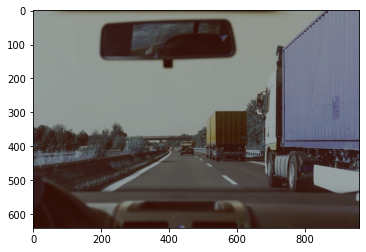

In [402]:
plt.imshow(blurred_img)

In [403]:
blurred_img = blur(blurred_img)

for i in range(0,25):
    blurred_img=blur(blurred_img)

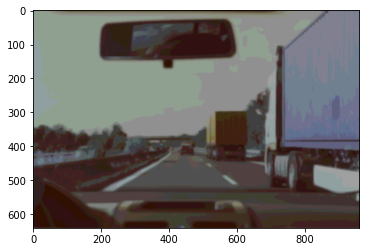

In [404]:
plt.imshow(blurred_img)

In [162]:
# Kernel for edge detection weighs
#Sharp changes 

#All numbers in kernel sum to zero

# if there's no edge, then it will sum to
#zero and be black

# if there's an edge, then

# An Edge is a sharp change in color

In [145]:
def edge_detection(a):
    row1 = [0.0,0.0,0.0]
    row2 = [0.0,10,0.0]
    row3 = [0.0,0.0,0.0]
    kernel = np.array([row1, row2, row3])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist = np.round(arraylist,0).astype(int)
    arraylist_sum = np.sum(arraylist, axis=0)
    
    return arraylist_sum

In [146]:
edges = edge_detection(img_array)

In [147]:
edges.shape

(640, 960, 3)

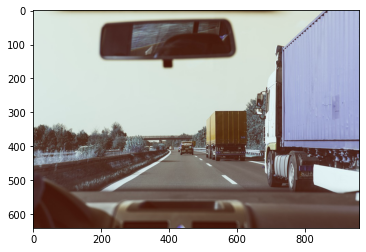

In [148]:
plt.imshow(edges)

## Part 3 Broadcasting in NLP Data
<hr style="border:2px solid gray"> </hr>